<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Discovery
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

### Read raw data that we have collected

In [2]:
processed_df=pd.read_csv("../data/processed/preprocess_QCL.csv")
processed_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note
0,QCL,237,5312,711,1961,ha,1000.00,E,NaN
1,QCL,237,5419,711,1961,100 g/ha,7000.00,E,NaN
2,QCL,237,5510,711,1961,t,700.00,E,NaN
3,QCL,237,5312,711,1962,ha,1000.00,E,NaN
4,QCL,237,5419,711,1962,100 g/ha,7000.00,E,NaN
...,...,...,...,...,...,...,...,...,...
15065,QCL,237,5419,1735,2020,100 g/ha,170584.00,E,NaN
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN
15067,QCL,237,5312,1735,2021,ha,1002974.00,E,NaN
15068,QCL,237,5419,1735,2021,100 g/ha,171731.00,E,NaN


With the dataframe we have, we shall make 2 questions regarding to discovery of the data:

### 1. What is the production growth of each item in Vietnam Agriculture, from 2000 to 2021?
### 2. What is the correlation between all of the elements in each items?

Solving question 1
### Extracting only the production values from the dataframe

In [3]:
element_name = pd.read_csv("../data/external/element_code.csv")
item_name = pd.read_csv("../data/external/item_code.csv")
processed_df = processed_df.merge(element_name, how= 'left', on= 'Element Code')
processed_df = processed_df.merge(item_name, how= 'left', on= 'Item Code')

In [4]:
processed_df_production=processed_df[(processed_df['Element Code']== 5510) | (processed_df['Element Code']== 5513)][processed_df['Year'].between(2000, 2021)]
processed_df_production.head()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15748\1866551136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_df_production=processed_df[(processed_df['Element Code']== 5510) | (processed_df['Element Code']== 5513)][processed_df['Year'].between(2000, 2021)]


,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element,Item
119,QCL,237,5510,711,2000,t,3200.00,E,NaN,Production (t),"Anise, badian, coriander, cumin, caraway, fenn..."
122,QCL,237,5510,711,2001,t,3176.35,I,NaN,Production (t),"Anise, badian, coriander, cumin, caraway, fenn..."
125,QCL,237,5510,711,2002,t,3244.44,I,NaN,Production (t),"Anise, badian, coriander, cumin, caraway, fenn..."
128,QCL,237,5510,711,2003,t,3300.00,E,NaN,Production (t),"Anise, badian, coriander, cumin, caraway, fenn..."
131,QCL,237,5510,711,2004,t,3396.46,I,NaN,Production (t),"Anise, badian, coriander, cumin, caraway, fenn..."


In [5]:
processed_df[processed_df['Item Code'] == 1735]

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element,Item
14887,QCL,237,5312,1735,1961,ha,198600.00,E,NaN,Area harvested (ha),Vegetables Primary
14888,QCL,237,5419,1735,1961,100 g/ha,88419.00,E,NaN,Yield (100 g/ha),Vegetables Primary
14889,QCL,237,5510,1735,1961,t,1756000.00,E,NaN,Production (t),Vegetables Primary
14890,QCL,237,5312,1735,1962,ha,199700.00,E,NaN,Area harvested (ha),Vegetables Primary
14891,QCL,237,5419,1735,1962,100 g/ha,89785.00,E,NaN,Yield (100 g/ha),Vegetables Primary
...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,237,5419,1735,2020,100 g/ha,170584.00,E,NaN,Yield (100 g/ha),Vegetables Primary
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN,Production (t),Vegetables Primary
15067,QCL,237,5312,1735,2021,ha,1002974.00,E,NaN,Area harvested (ha),Vegetables Primary
15068,QCL,237,5419,1735,2021,100 g/ha,171731.00,E,NaN,Yield (100 g/ha),Vegetables Primary


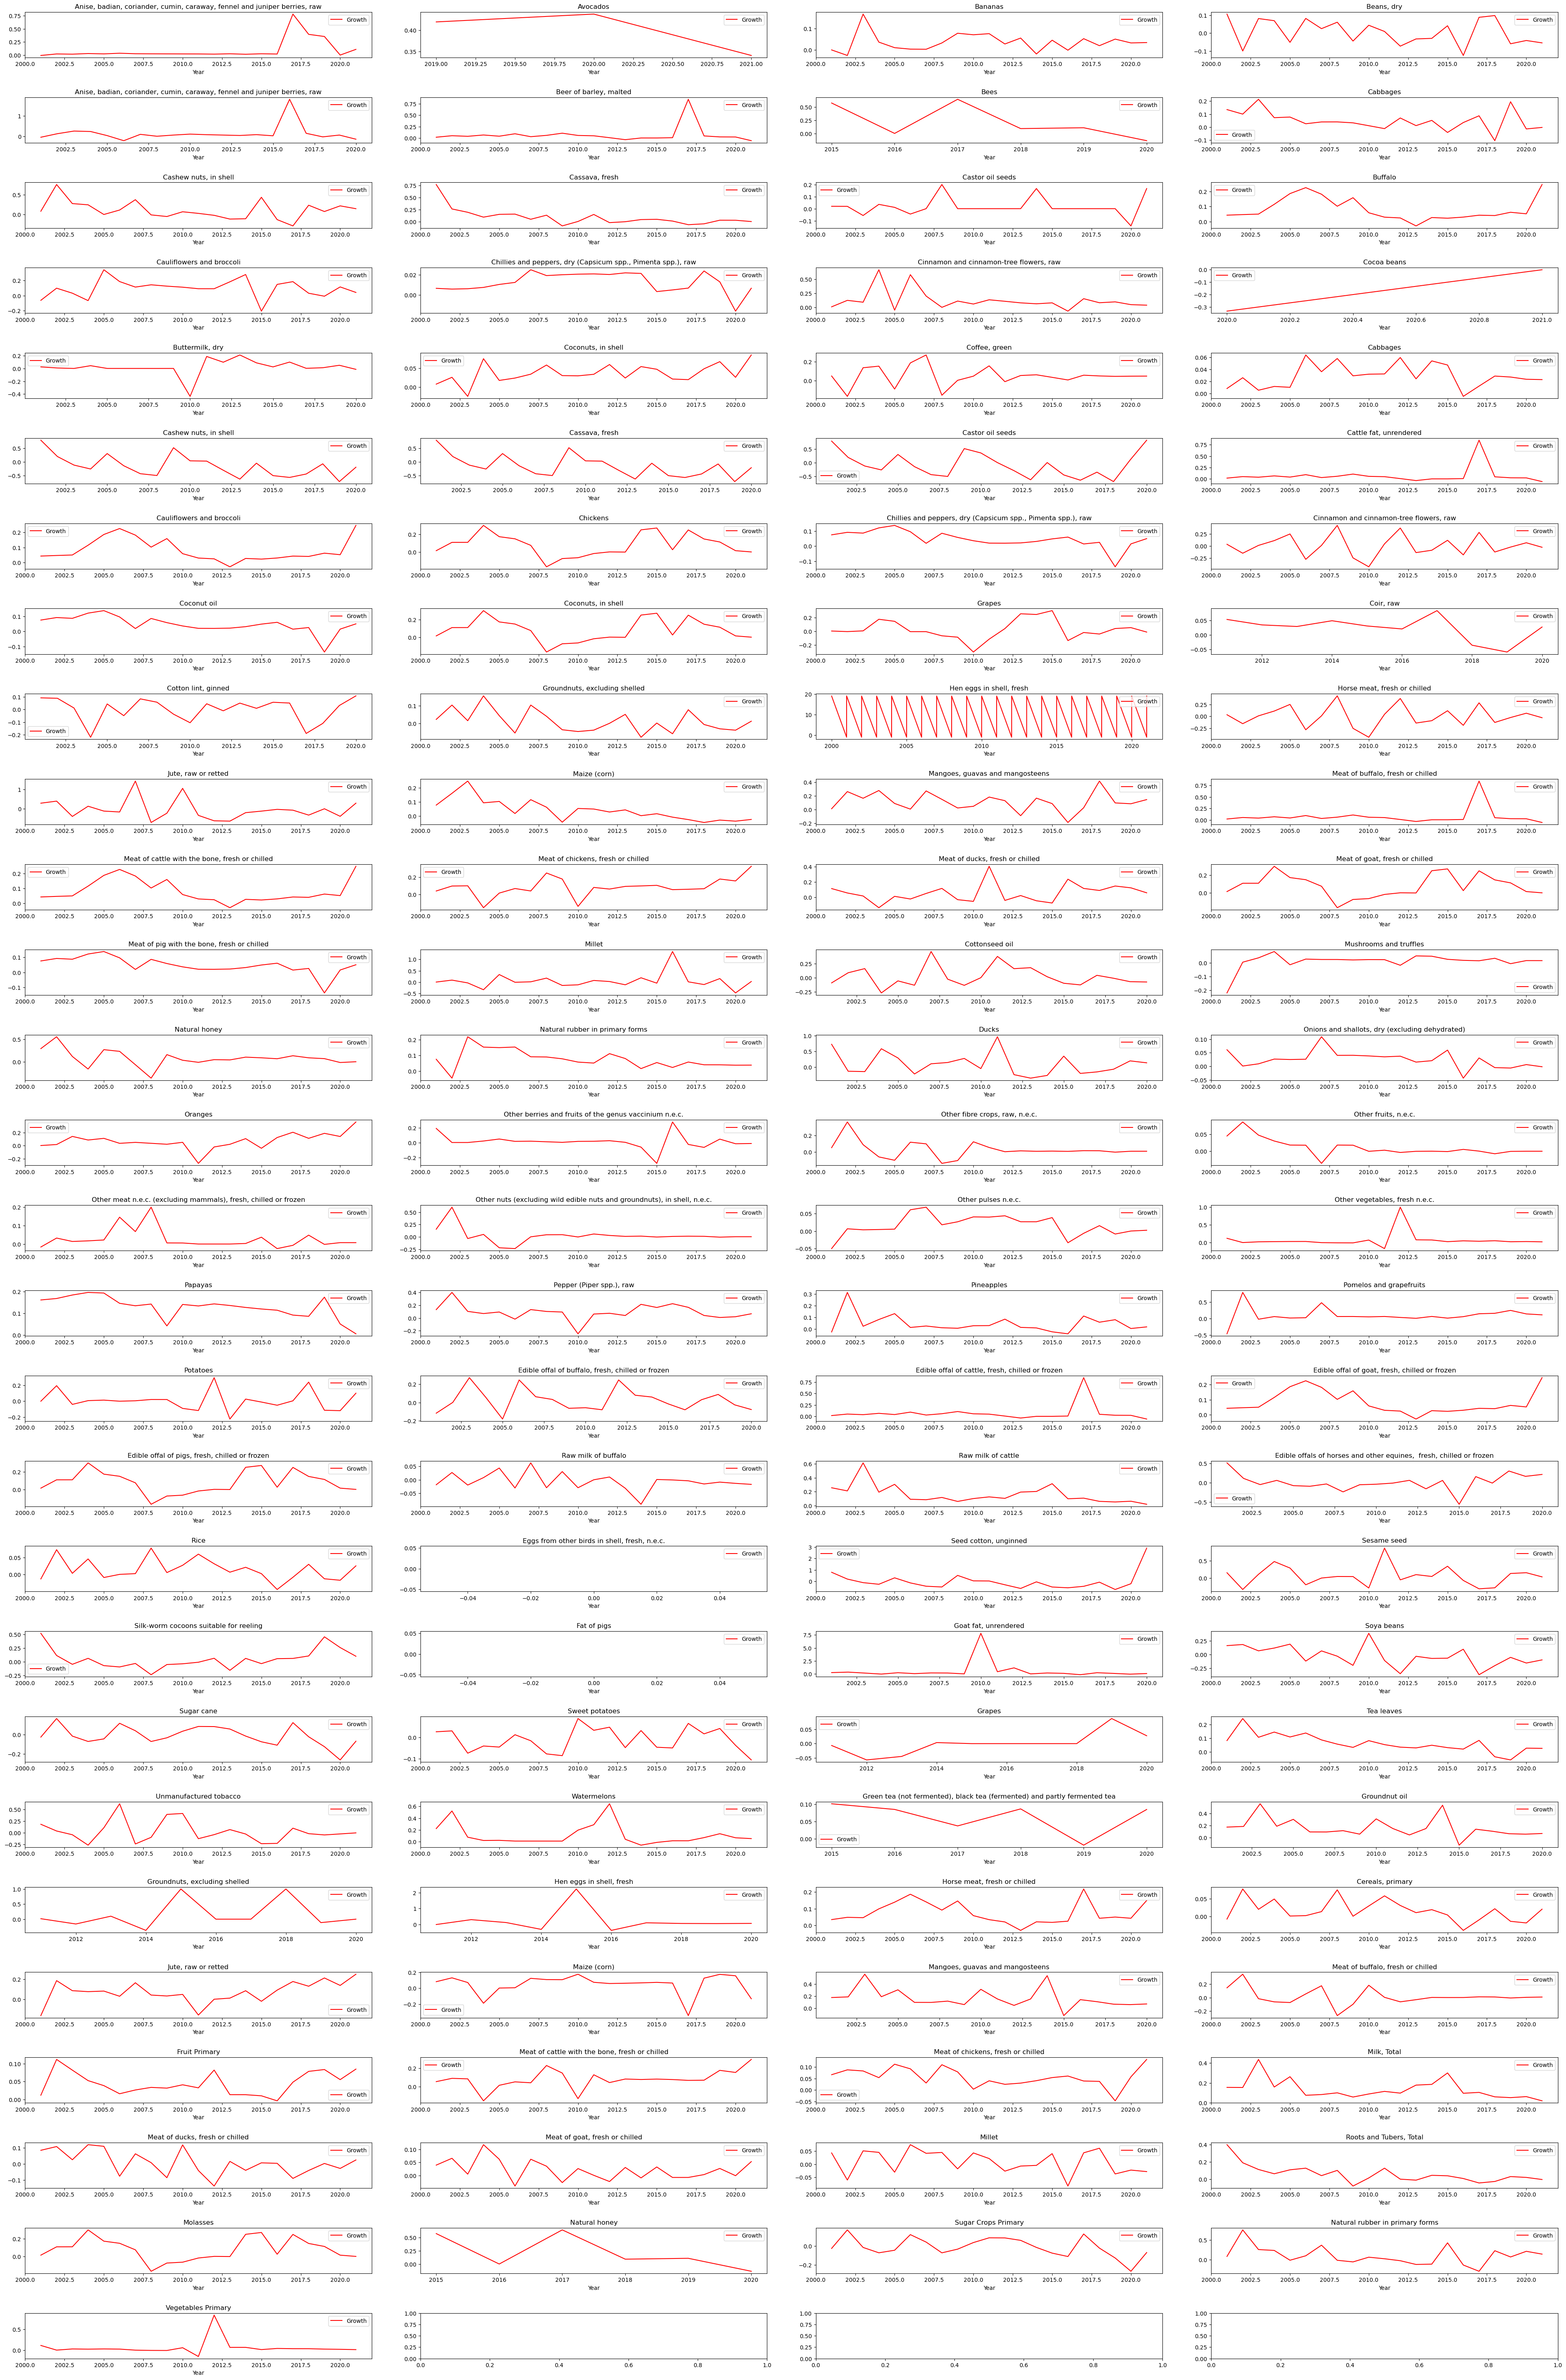

In [6]:
nrow = 28
ncol = 4
i=0
j=0

fig, axes=plt.subplots(nrow, ncol, figsize=(40, 60))
fig.tight_layout(pad=5.0)

for item in processed_df_production['Item Code'].unique():
    temp=processed_df_production[processed_df_production['Item Code']==item]
    
    newPandas=pd.DataFrame()
    newPandas['Growth']=temp['Value'].pct_change()
    newPandas['Year']=temp['Year'].astype(int)
    newPandas.plot(x='Year', y='Growth', color='red', title= item_name[item_name['Item Code'] == item]['Item'].unique()[0], ax=axes[i][j])

    j += 1
    if j == ncol:
        j = 0
        i += 1

Question 2

### The same way, extract the dataframe within the year of 2000 and 2021

In [7]:
item_name[item_name['Item'] == 'Rice']

,Item Code,Item
55,27,Rice


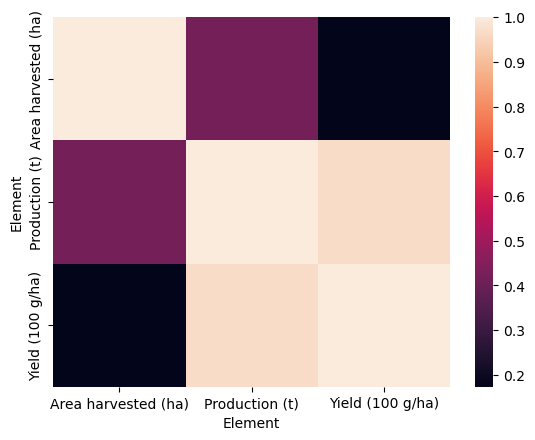

In [8]:
processed_df_extracted=processed_df[processed_df['Year'].between(2000, 2021)]
temp=processed_df_extracted[processed_df_extracted['Item Code'] == 27]
temp=temp.drop(columns=['Item Code'])
temp=temp.pivot_table('Value', ['Domain Code', 'Area Code', 'Year'], ['Element'])
hm=sbn.heatmap(data=temp.corr())
plt.show()

In [9]:
nrows=31
ncols=4

i=0 
j=0

fig, axes=plt.subplots(nrow, ncol, figsize=(40, 60))
fig.tight_layout(pad=5.0)

for item in processed_df_extracted['Item Code'].unique():
    
    df=processed_df_extracted[processed_df_extracted['Item Code'] == item]
    df=df.drop(columns=['Item Code'])
    df=df.pivot_table('Value', ['Domain Code', 'Area Code', 'Year'], ['Element'])
     
    hm=sbn.heatmap(data=df.corr(), ax=axes[i][j])

    j += 1
    if j==ncol:
        j = 0
        i += 1

KeyboardInterrupt: 